In [396]:
#####################################################################################################################
################### Importing important packages and libraries ######################################################
#####################################################################################################################
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [397]:
##############################
##### Getting the data set ###
##############################

df = sns.load_dataset('tips')

In [398]:
#############################
####### Checking our df ####
############################

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [399]:
###############################################################################
######## Its the table of the people who tip and how much they tip, interesting.
######## Lets do some EDA on this and make use of seaborn plots. ##############
###############################################################################

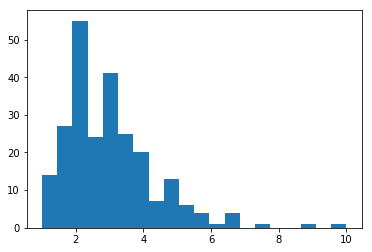

In [568]:
#### First we will do a simple histogram plot

plt.hist(df.tip, bins=20,label=df.size)


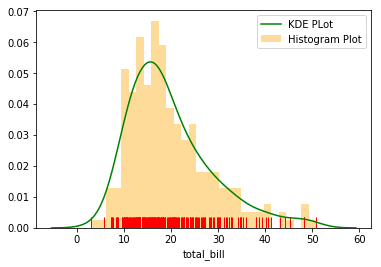

In [570]:
##### ALthough this is a good plot but very basic, lets use the seaborn for more intricate plots

sns.distplot(df.total_bill,rug=True,bins=30,
            rug_kws={'color':'red','label':'Rug Plot'},
            hist_kws={'color':'orange','label':'Histogram Plot'},
            kde_kws={'color':'green','label':'KDE PLot'})


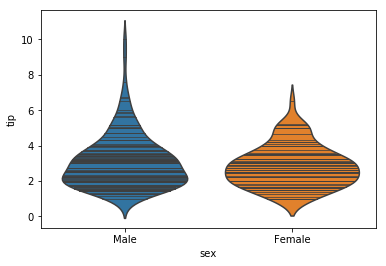

In [571]:
######## it seems like the total bills usually hang around between 10-28 ratio
#### lets do more digging

sns.violinplot(df.sex,df.tip,inner='stick')


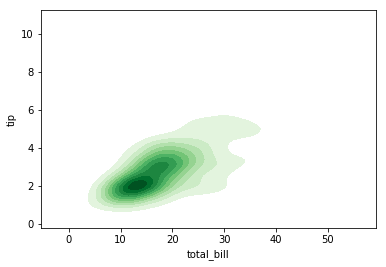

In [572]:
###### from the above plot it seems Male are likely to tip
##### Lets see some kde plots with regards to the total bills and tips

sns.kdeplot(df.total_bill,df.tip,cmap='Greens', shade=True, shade_lowest=False)


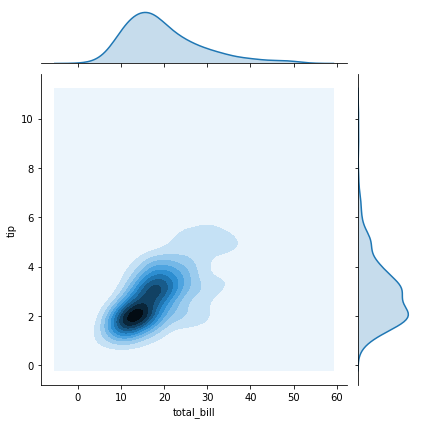

In [573]:
sns.jointplot(df.total_bill,df.tip,kind='kde',shade=True)


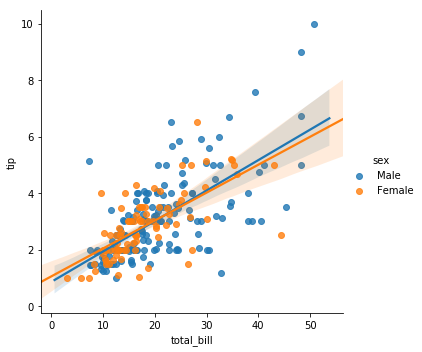

In [574]:
###### here we clearly see that the majority of the data is tips around 0-2 and bills around 10-15
#### Now lets do some scatter plots which is my favorite of any kind of plots

sns.lmplot('total_bill','tip',tips,hue='sex')


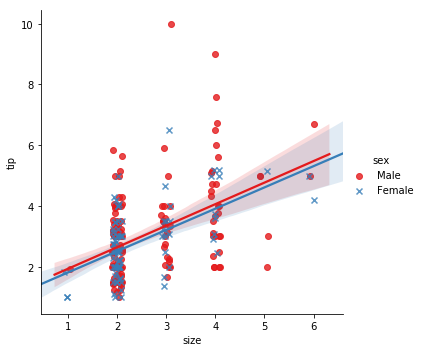

In [575]:
sns.lmplot('size','tip',tips,hue='sex',palette='Set1',markers=['o','x'],x_jitter=0.1)


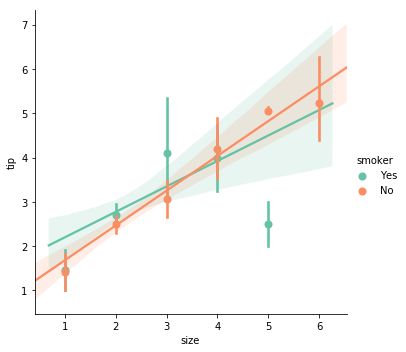

In [576]:
###### its pretty interesting to know that as the size increases the tip also increases like a linear regression model

sns.lmplot('size','tip',tips,x_estimator=np.mean,hue='smoker',palette='Set2')


In [506]:
#### from the plot above anybody can tell that non smokers are better tippers but that will be misleading
#### we count the values of smokers to non smokers and we see non smokers are higher in numbers so now it makes sense

df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

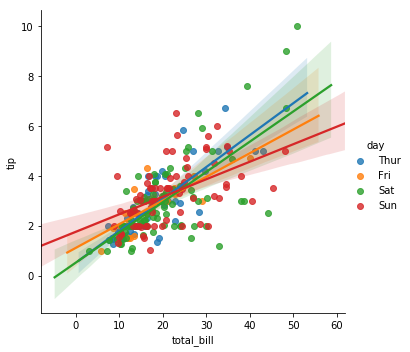

In [577]:
##### Now lets see how are the tips during the days or weekends

sns.lmplot('total_bill','tip',tips,hue='day')


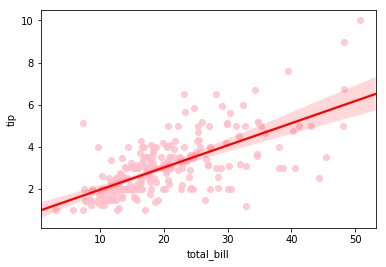

In [578]:
##### its not really that suprising, it seems the tip and bills are higher during the weekends
##### Now lets do a regplot quickly

sns.regplot('total_bill','tip',tips,
           line_kws={'color':'red'},
           scatter_kws={'color':'pink'})


In [552]:
##### pivoting the table for tips

df_pivot = df.pivot_table(index='day',columns='size',values='tip')

In [553]:
df_pivot

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


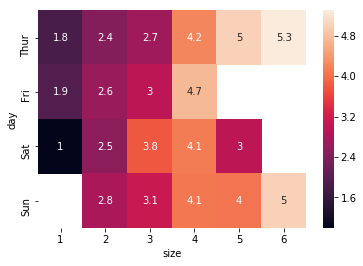

In [579]:
sns.heatmap(df_pivot,annot=True)


In [564]:
#### we can clearly see that size on sunday is never 1, meaning people are coming in with atleast +1 on sunday
#### then we see on Friday we dont get more then 4 people and on saturday we dont get more then 5 as the table size


size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0
